#**Анализ маркетинговых показателей и пользовательских метрик развлекательного приложения Procrastinate Pro+**

**Задача исследования:**

Заказчик - компания, владеющая развлекательным приложением Procrastinate Pro+. Задача исследования - провести анализ того, почему компания терпит убытки в последние несколько месяцев, несмотря на значительные вложения в рекламу. Основная цель — разобраться в причинах и помочь компании выйти в плюс.

**План работ**

+ изучить, откуда приходят пользователи в приложение и какими устройствами они пользуются, какие факторы мешают привлечению клиентов;
+ оценить, сколько стоит привлечение пользователей через различные рекламные каналы; проанализировать, когда расходы на привлечение клиента окупаются, когда - нет;
+ проанализировать маркетинговые метрики (LTV, CAC, ROI);
+ оценить окупаемость рекламы с разбивкой по странам, устройствам и каналам привлечения, изучить конверсию и удержание с разбивкой по всем этим параметрам.

**Описание данных**

Файлы содержат данные о пользователях приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года. Данные распределены по трем датасетам:
+ visits_info_short.csv: лог сервера с данными об посещениях пользователей
+ orders_info_short.csv: выгрузка покупок пользователей за соответствующий период
+ costs_info_short.csv: данные по рекламным расходам

Описание данных *visits_info_short.csv*:

+ User Id — уникальный идентификатор пользователя,
+ Region — страна пользователя,
+ Device — тип устройства пользователя,
+ Channel — идентификатор источника перехода,
+ Session Start — дата и время начала сессии,
+ Session End — дата и время окончания сессии.

Описание данных *orders_info_short.csv*

+ User Id — уникальный идентификатор пользователя,
+ Event Dt — дата и время покупки,
+ Revenue — сумма заказа.

Описание данных *costs_info_short.csv*

+ Channel — идентификатор рекламного источника,
+ Dt — дата проведения рекламной кампании,
+ Costs — расходы на эту кампанию.

 ## **Загрузка данных и подготовка их к анализу**

In [1]:
! gdown 1IpWZrs0xnKINsCsSFvQjdQgdOFrNdRAN

Downloading...
From: https://drive.google.com/uc?id=1IpWZrs0xnKINsCsSFvQjdQgdOFrNdRAN
To: /content/visits_info_short.csv
100% 25.0M/25.0M [00:00<00:00, 124MB/s] 


In [2]:
! gdown 1SIqUIPb4Zluik9pvjQsp16CRm1nNNyj_

Downloading...
From: https://drive.google.com/uc?id=1SIqUIPb4Zluik9pvjQsp16CRm1nNNyj_
To: /content/orders_info_short.csv
100% 1.57M/1.57M [00:00<00:00, 129MB/s]


In [3]:
! gdown 1LJRtX_uWFojva8S2_hT8BJIX9ienmjMA

Downloading...
From: https://drive.google.com/uc?id=1LJRtX_uWFojva8S2_hT8BJIX9ienmjMA
To: /content/costs_info_short.csv
100% 59.6k/59.6k [00:00<00:00, 39.1MB/s]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
from datetime import datetime, timedelta

In [6]:
sns.set()

Сохраним данные из файла visits_info_short.csv в переменной sessions

In [7]:
sessions = pd.read_csv('/content/visits_info_short.csv')
sessions.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Общая информация о данных датафрейма sessions

In [ ]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [ ]:
sessions.duplicated().sum()

0

Всего в таблице 6 столбцов. Первый столбец с идентификаторами пользователей имеет тип int64, остальные - object. У нас есть два столбца с датами (Session Start и Session End), которые необходимо привести к типу datetime.

Количество значений во всех столбцах не отличается, значит, пропусков нигде нет. Дубликаты тоже отсутствуют. 

В названиях столбцов присутствуют заглавные буквы и пробелы, целесообразно будет привести их к эталонному виду. 

Сохраним данные из файла orders_info_short.csv в переменной orders

In [8]:
orders = pd.read_csv('/content/orders_info_short.csv')
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [ ]:
orders.duplicated().sum()

0

В таблице orders 3 столбца. Первый столбец с идентификаторами пользователей имеет тип int64, столбец с датой события - object (его надо будет привести к типу datetime). Третий столбец с данными о доходах - тип float.

Количество значений в столбцах одинаковое, пропуски отсутствуют. Дубликаты тоже отсутствуют. 

В названиях столбцов присутствуют заглавные буквы и пробелы - необходимо  будет переименовать их. 

Сохраним данные из файла costs_info_short.csv в переменной costs

In [9]:
costs = pd.read_csv('/content/costs_info_short.csv')
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [ ]:
costs.duplicated().sum()

0

В таблице costs 3 столбца. Столбец с датой, как и в предыдущих датафреймах необходимо будет привести к типу datetime, типы остальных столбцов оставляем без изменений.

Количество значений в столбцах одинаковое, пропуски отсутствуют. Дубликаты  отсутствуют. 

Названия столбцов на этапе предобратоки необходимо привести к эталонному виду. 

## **Предобработка данных**

Поменяем названия столбцов в датафрейме sessions и приведем столбцы с датами к типу datetime. 

In [10]:
sessions.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [11]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])

In [12]:
sessions['session_end'] = pd.to_datetime(sessions['session_end'])

Проверим, чтобы у нас не было аномальных (напр., отрицательных) или выпадающих значений в столбцах с числовыми данными и временем.

In [ ]:
sessions[['user_id', 'session_start', 'session_end']].apply(['min', 'max'])

,user_id,session_start,session_end
min,599326,2019-05-01 00:00:41,2019-05-01 00:07:06
max,999999563947,2019-10-31 23:59:23,2019-11-01 01:38:46


Саммая ранняя дата сессий пользователей - 1 мая 2019 года, самая поздняя - 1 ноября 2019 года, т.е. данные охватывают полных семь месяцев.

Проверим, как распределяются данные в столбцах с перечнем регионов, устройств и каналов привлечения.

In [ ]:
sessions.region.value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [ ]:
sessions.device.value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [ ]:
sessions.channel.value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Поменяем названия столбцов и типы данных в таблице orders

In [13]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Проверим минимальные и максимальные значения в столбцах с идентификаторами пользователей, датой и доходом на предмет отсутствия отрицательных или аномальных значений.

In [ ]:
orders[['user_id', 'event_dt', 'revenue']].apply(['min', 'max'])

,user_id,event_dt,revenue
min,599326,2019-05-01 00:28:11,4.99
max,999895427370,2019-10-31 23:56:56,49.99


Данные по сделанным через приложение покупками доступны за период с 1 мая 2019 года по 31 октября 2019 года, т.е. за полных семь месяцев. 

Посмотрим, как распределяются данные в столбце доходов

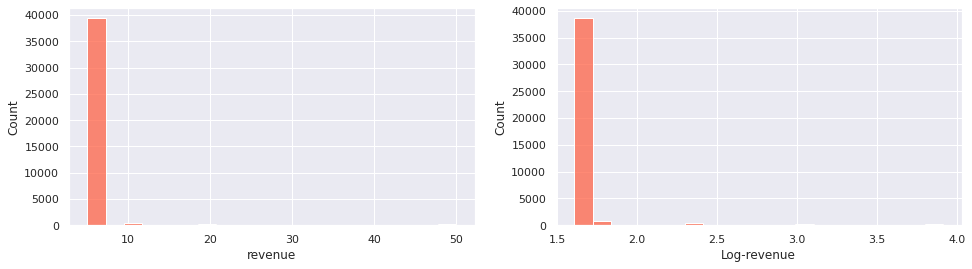

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.histplot(orders.revenue, kde=False, color="tomato", ax=ax[0], bins=20)
sns.histplot(np.log(orders.revenue), ax=ax[1], bins=20, color="tomato", kde=False)
ax[1].set_xlabel("Log-revenue");

Распределение данных по покупкам клиентов максимально скошено влево. Такая же картина наблюдается и у лог-распределения, что говорит нам о том, что подавляющая часть данных лежит в районе минимального значения в 4.99 долл., при этом есть выбивающиеся значения, однако они единичны.

In [ ]:
orders.revenue.describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [ ]:
(orders['revenue'] > 4.99).mean()

0.039316621903909284

В 96% случаев пользователи тратят в приложении минимально возможную сумму в 4,99 долл. И лишь в 4% случаев - большую сумму.  

Поменяем названия столбцов в таблице costs и приведем столбец с датой к типу datetime.

In [15]:
costs = costs.rename(columns={'Channel': 'channel'})

In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [ ]:
costs[['dt', 'costs']].apply(['min', 'max'])

,dt,costs
min,2019-05-01,0.8
max,2019-10-27,630.0


Данные в таблицы costs собраны за период с 1 мая 2019 года по 27 октября 2019 года, т.е. чуть менее чем за семь месяцев.

In [ ]:
costs.channel.value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [ ]:
costs.costs.describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Ежедневные расходы на рекламу колеблются в пределах от 0,8 долл. до 630 долл. Среднее значение - 58,6 долл. При этом медианное значение почти в шесть раз ниже - 12,3 долл., что говорит о наличии выбивающихся высоких значений.

Посмотрим на гистограмму распределения.

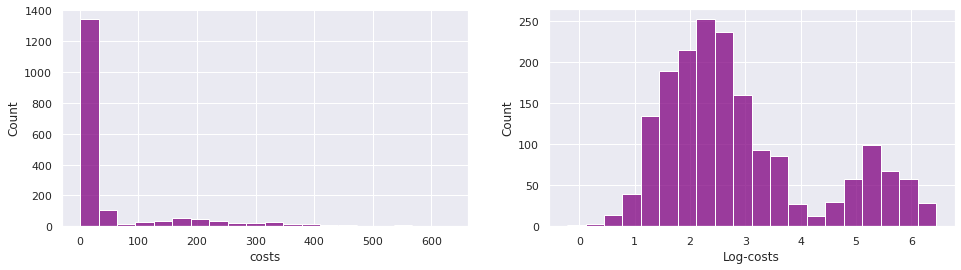

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.histplot(costs.costs, ax=ax[0], kde=False, color="purple", bins=20)
sns.histplot(np.log(costs.costs), ax=ax[1], bins=20, color="purple", kde=False)
ax[1].set_xlabel("Log-costs");

In [ ]:
np.exp(4.1)

60.34028759736195

Распределение сильно скошено влево. На лог-распределении видно, что у нас явно выделяются две группы источников по размеру трат: первая группа с расходами, не превышающими 60 долл. и вторая группа - где расходы на порядок выше.

Посмотрим, на какие источники приходятся наибольше траты на рекламу.

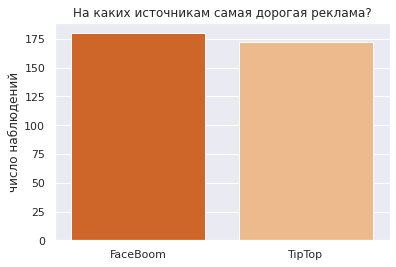

In [ ]:
over_60 = costs.query('costs > 60').channel.value_counts()
sns.barplot(x=over_60.index, y=over_60.values, palette='Oranges_r')
plt.ylabel("число наблюдений")
plt.title("На каких источникам самая дорогая реклама?");

Из общей картины выбиваются лишь два источника - FaceBoom и TipTop. Они отличаются по рекламным расходов от основной группы: здесь реклама обходится выше чем в 60 долл. за сутки.

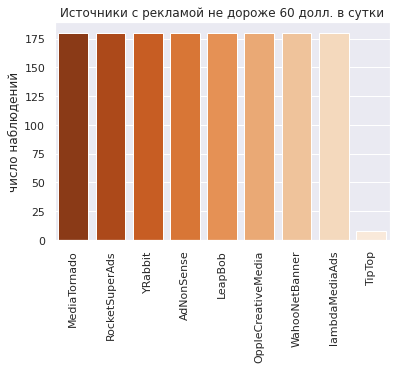

In [ ]:
under_60 = costs.query('costs <= 60').channel.value_counts()
sns.barplot(x=under_60.index, y=under_60.values, palette='Oranges_r')
plt.ylabel("число наблюдений")
plt.title("Источники с рекламой не дороже 60 долл. в сутки")
plt.xticks(rotation=90);

У остальных источников реклама стоит на порядок ниже. У TipTop в отдельные дни тоже были небольшие расходы, однако такие дни единичны. 

## **Исследовательский анализ данных**

### **Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей**

Функция для создания профиля

In [22]:
def get_profiles(sessions, orders, costs):
    # Отбираем из таблицы sessions информацию о первых посещениях пользователей
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # Создадим столбцы с датой и месяцем первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # Создадим столбец с булевым значением для платящих клиентов
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id']) 
    # В таблицу new_users отберем кол-во клиентов в разбивке по дате и каналу
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # Присоединим таблицу new_users к costs и подсчитает стоимость привлечения одного пользователя
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    # Вставим эти данные в таблицу profiles и заменим отсутствующие значения на 0
    profiles = profiles.merge(costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [23]:
profiles = get_profiles(sessions, orders, costs)

In [24]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [ ]:
profiles['first_ts'].apply(['min', 'max'])

min   2019-05-01 00:00:41
max   2019-10-27 23:59:04
Name: first_ts, dtype: datetime64[ns]

Самая ранняя дата, по которой у нас есть привлеченные пользователи - 1 мая 2019 года, самая поздняя - 27 октября 2019 года.

### **Из каких стран пользователи приходят в приложение**

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

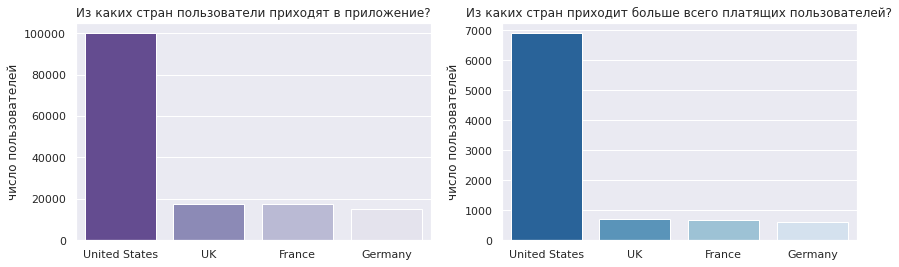

In [26]:
region_counts = profiles.region.value_counts().sort_values(ascending=False)
region_payers_counts = profiles.query('payer == True').region.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(1,2,figsize=(14,4))

sns.barplot(x=region_counts.index, y=region_counts.values, palette="Purples_r", ax=ax[0])
sns.barplot(x=region_payers_counts.index, y=region_payers_counts.values, palette="Blues_r", ax=ax[1])

ax[0].set_ylabel("число пользователей")
ax[1].set_ylabel("число пользователей")
ax[0].set_title("Из каких стран пользователи приходят в приложение?")
ax[1].set_title("Из каких стран приходит больше всего платящих пользователей?");

Зададим функцию для формирования таблицы с группировкой по желаемым параметрам и столбцами с числом уникальных пользователей (user_cnt), число платящих пользователей (payer_cnt), уровнем конверсии (payers_conversion), доли региона (канала или устройства) среди общего числа пользователей (share_in_total) и доли параметра среди числа платящих пользователей (share_in_payers).

In [ ]:
def table_share(col):
  table = (
    profiles.groupby(col)['payer'].agg(['count', 'sum', 'mean'])
    .assign(share_in_total=lambda x:x['count']/profiles['user_id'].count(), \
            share_in_payers=lambda x:x['sum']/profiles['payer'].sum())
    .rename(columns={'count':'user_cnt', 'sum':'payer_cnt', 'mean':'payers_conversion'})
    .sort_values(by='user_cnt', ascending=False)
    .reset_index()
    .style.format('{:.1%}', subset=['payers_conversion','share_in_total', 'share_in_payers'])
  )
  return table

In [28]:
profiles.groupby('region')['payer'].agg(['count', 'sum', 'mean'])

,count,sum,mean
region,,,
France,17450,663,0.037994
Germany,14981,616,0.041119
UK,17575,700,0.039829
United States,100002,6902,0.069019


In [ ]:
col = ['region']
table_share(col)

,region,user_cnt,payer_cnt,payers_conversion,share_in_total,share_in_payers
0,United States,100002,6902,6.9%,66.7%,77.7%
1,UK,17575,700,4.0%,11.7%,7.9%
2,France,17450,663,3.8%,11.6%,7.5%
3,Germany,14981,616,4.1%,10.0%,6.9%


Подавляющее число пользователей приложения - из США. На их долю приходится две три всех привлеченных пользователей (66,7%). То же самое можно сказать и про платящих пользователей - здесь американцев в процентном соотношении еще больше, чем пользователей из других стран (ок.78%). Кроме того, американцы - самые "качественные" клиенты с точки зрения конверсии: покупателями из них становятся 7% пользователей, в то время как в остальных странах этот показатель составляет от 3,8% до 4,1%. Определенно именно клиенты из США приносят наибольший доход компании, поэтому стоит на них обратить особое внимание при дальнейшем анализе.

### **С каких устройств клиенты заходят в приложение**

Посмотрим на графике, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

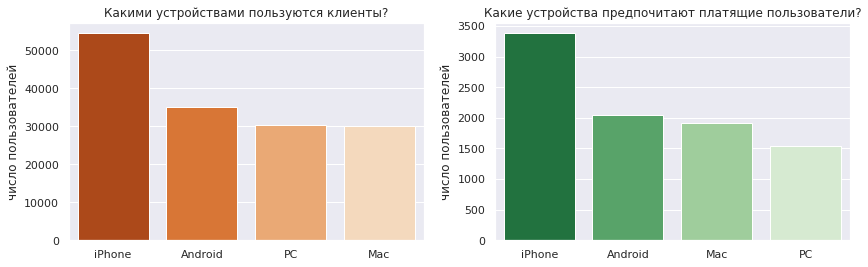

In [ ]:
device_counts = profiles.device.value_counts().sort_values(ascending=False)
device_payers_counts = profiles.query('payer == True').device.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(1,2,figsize=(14,4))

sns.barplot(x=device_counts.index, y=device_counts.values, palette="Oranges_r", ax=ax[0])
sns.barplot(x=device_payers_counts.index, y=device_payers_counts.values, palette="Greens_r", ax=ax[1])

ax[0].set_ylabel("число пользователей")
ax[1].set_ylabel("число пользователей")
ax[0].set_title("Какими устройствами пользуются клиенты?")
ax[1].set_title("Какие устройства предпочитают платящие пользователи?");

In [ ]:
col = ['device']
table_share(col)

,device,user_cnt,payer_cnt,payers_conversion,share_in_total,share_in_payers
0,iPhone,54479,3382,6.2%,36.3%,38.1%
1,Android,35032,2050,5.9%,23.4%,23.1%
2,PC,30455,1537,5.0%,20.3%,17.3%
3,Mac,30042,1912,6.4%,20.0%,21.5%


Учитывая, что основная часть клиентов компании - из США, не удивительно, что основное устройство для входа в приложение - iPhone: отсюда заходит 36% новых клиентов. На втором месте - устройства Android (23%), а третье и четвертое - делят между собой пользователи PC и Mac (по 20%). Характерно, что среди платящих клиентов iPhone снова на первом месте (38,1%). У пользователей iPhone и Mac также самая высокая конверсия - 6,4% (Mac) и 6,2% (iPhone). Отметим, что это опять-таки устройства, предпочитаемые американскими пользователями.  

### **Каналы привлечения пользователей**

Анализ рекламных источников привлечения. Из каких каналов пришло больше всего платящих пользователей. Построим график и таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

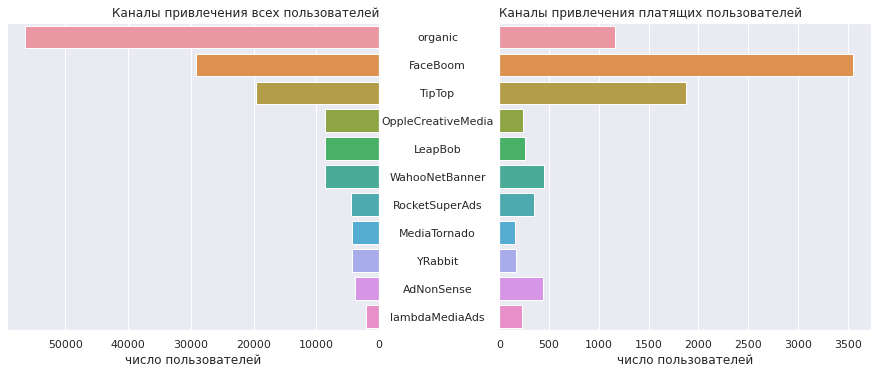

In [ ]:
channel_counts = profiles.channel.value_counts().sort_values(ascending=False)
channel_payers_counts = profiles.query('payer == True').channel.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(1,2,figsize=(12,5))
labels=channel_counts.index
sns.barplot(x=channel_counts.values, y=channel_counts.index, ax=ax[0])
sns.barplot(x=channel_payers_counts.values, y=channel_payers_counts.index, order=channel_counts.index, ax=ax[1])

ax[0].invert_xaxis() 
ax[0].tick_params(labelleft=False, left=False)
ax[1].set_yticklabels(labels, ha='center', position=(-0.14,0))

ax[0].set_xlabel("число пользователей")
ax[1].set_xlabel("число пользователей")
ax[0].set_title("Каналы привлечения всех пользователей", loc='right')
ax[1].set_title("Каналы привлечения платящих пользователей", loc='left');

plt.tight_layout(w_pad=0.7, pad=0)
plt.show()

In [ ]:
col = ['channel']
table_share(col)

,channel,user_cnt,payer_cnt,payers_conversion,share_in_total,share_in_payers
0,organic,56439,1160,2.1%,37.6%,13.1%
1,FaceBoom,29144,3557,12.2%,19.4%,40.1%
2,TipTop,19561,1878,9.6%,13.0%,21.1%
3,OppleCreativeMedia,8605,233,2.7%,5.7%,2.6%
4,LeapBob,8553,262,3.1%,5.7%,3.0%
5,WahooNetBanner,8553,453,5.3%,5.7%,5.1%
6,RocketSuperAds,4448,352,7.9%,3.0%,4.0%
7,MediaTornado,4364,156,3.6%,2.9%,1.8%
8,YRabbit,4312,165,3.8%,2.9%,1.9%
9,AdNonSense,3880,440,11.3%,2.6%,5.0%


Больше всего платящих пользователей приходит через рекламу на FaceBoom (40%). На втором месте - TipTop, но его доля почти в два раза меньше - 21%. На третьем месте - органические пользователи (13%). Остальные источники имеют долю в районе 5% и ниже. По конверсии самые "качественные" каналы - это FaceBoom (12,2%), AdNonSense (11,3%) и lambdaMediaAds (10,5%). Однако число клиентов, приходящих через последние два канала невелико (5% и 2,5%).   

## **Маркетинг**

### **Общие показатели расходов на маркетинг**

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [ ]:
# Общая сумма расходов
round(costs.costs.sum(),1)

105497.3

In [ ]:
# Общая сумма доходов
round(orders.revenue.sum(),1)

215962.9

Всего на рекламу компания потратила 105,5 тыс. При этом доходы от платящих пользователей за весь период составили 216 тыс. Пока выглядит неплохо.

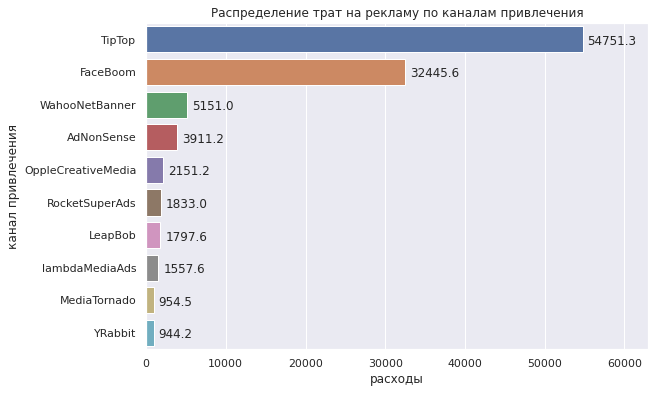

In [ ]:
cost_counts = costs.groupby('channel')['costs'].sum().sort_values(ascending=False)
plt.figure(figsize=(9,6))
ax = sns.barplot(x=cost_counts.values, y=cost_counts.index)

for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.87),
                xytext=(5, 10), textcoords='offset points')
    
plt.xlabel("расходы")
plt.ylabel("канал привлечения")
plt.title("Распределение трат на рекламу по каналам привлечения")
plt.xlim(0,63000);

Львиная доля рекламного бюджета уходит на два канала - TipTop и FaceBoom, что на первый взгляд выглядит оправданно, учитывая, что именно через эти каналы привлекается подавляющая часть платящих пользователей. 

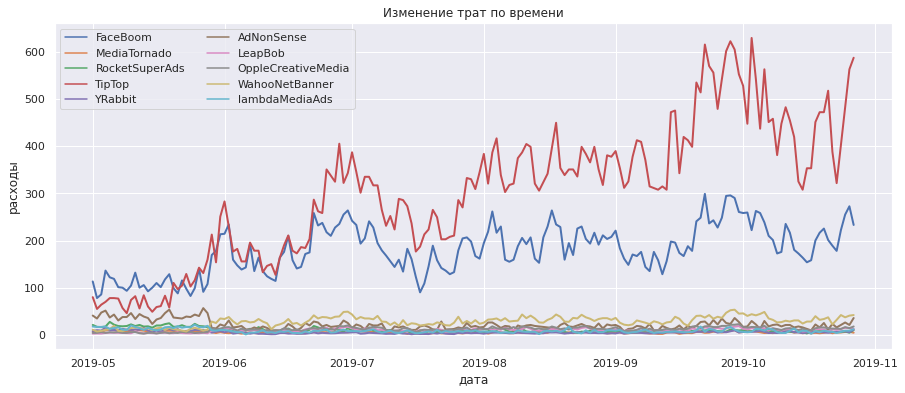

In [ ]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x='dt', y='costs', hue='channel', data=costs, estimator=np.sum, ci=False, linewidth=2)

plt.legend(ncol=2, loc='upper left')
plt.xlabel('дата')
plt.ylabel('расходы')
plt.title("Изменение трат по времени")
plt.show();

Мы также наблюдаем рост расходов на рекламу по этим двум источникам на протяжении исследуемого периода. При этом расходы по другим каналам остаются все это время примерно на одном и том же уровне. Очевидно, что компания сделала ставку на привлечение клиентов именно через эти два канала, направив туда основную часть бюджета и поступательно наращивая объемы расходов. Насколько такая стратегии является правильной - нужно посмотреть, изучив другие метрики. 

Посмотрим, растет ли на фоне увеличения расходов на рекламу количество вновь привлекаемых пользователей.

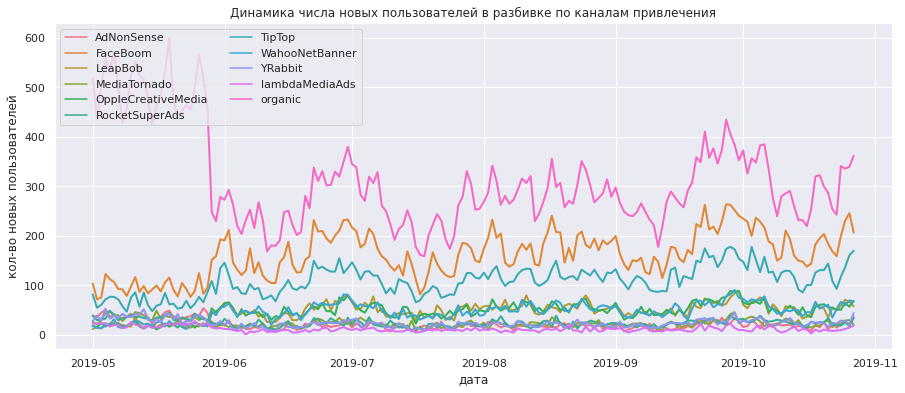

In [ ]:
users_attracted = profiles.groupby(['dt', 'channel'])['user_id'].count().reset_index()

fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x='dt', y='user_id', hue='channel', data=users_attracted, linewidth=2)

plt.legend(ncol=2, loc='upper left')
plt.xlabel('дата')
plt.ylabel('кол-во новых пользователей')
plt.title("Динамика числа новых пользователей в разбивке по каналам привлечения")
plt.show();

Число вновь привлекаемых через платные рекламные каналы пользователей выросло по сравнению с начальным периодом, однако основной рост пришелся на май 2019 года. После этого число новых клиентов для всех каналов колебалось примерно в одних и тех же пределах. Заметим, что TipTop, на который идет больше всего рекламных расходов, привлекает стабильно меньше по количеству клиентов, чем его конкурент FaceBoom. 

### **Сколько стоило привлечение одного пользователя**

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC (Customer Acquisition Cost) на одного пользователя для всего проекта и для каждого источника трафика.

In [ ]:
# Средняя стоимость привлечения пользователя через рекламные каналы
round(profiles.query('channel != "organic"').acquisition_cost.mean(),1)

1.1

In [ ]:
(
  profiles.query('channel != "organic"')
  .groupby('channel')['acquisition_cost'].mean()
  .sort_values(ascending=False).reset_index()
  .style.format('{:.1f}', subset=['acquisition_cost'])
)

,channel,acquisition_cost
0,TipTop,2.8
1,FaceBoom,1.1
2,AdNonSense,1.0
3,lambdaMediaAds,0.7
4,WahooNetBanner,0.6
5,RocketSuperAds,0.4
6,OppleCreativeMedia,0.2
7,YRabbit,0.2
8,MediaTornado,0.2
9,LeapBob,0.2


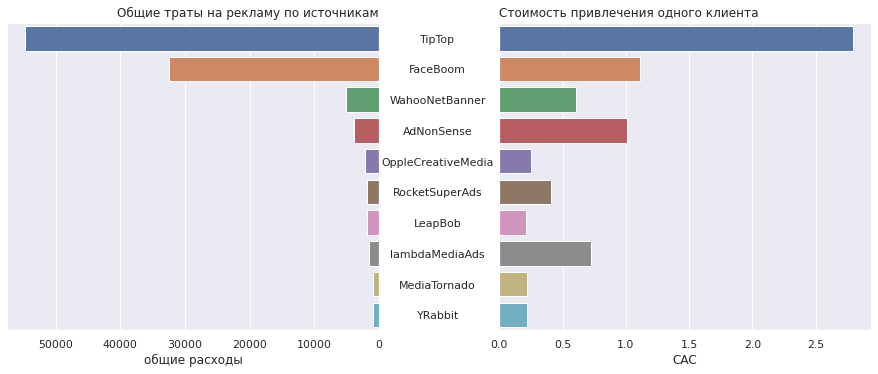

In [ ]:
cost_counts = (
    costs.groupby('channel')['costs'].sum()
    .sort_values(ascending=False)
)
cac_channel = (
    profiles.query('channel != "organic"')
    .groupby('channel')['acquisition_cost'].mean()
    .sort_values(ascending=False)
)    

fig, ax = plt.subplots(1,2,figsize=(12,5))
labels=cost_counts.index
sns.barplot(x=cost_counts.values, y=cost_counts.index, ax=ax[0])
sns.barplot(x=cac_channel.values, y=cac_channel.index, \
            order=cost_counts.index, ax=ax[1])

ax[0].invert_xaxis() 
ax[0].tick_params(labelleft=False, left=False)
ax[1].set_yticklabels(labels, ha='center', position=(-0.14,0))

ax[0].set_xlabel('общие расходы')
ax[0].set_ylabel('')
ax[1].set_xlabel('CAC')
ax[0].set_title("Общие траты на рекламу по источникам", loc='right')
ax[1].set_title("Стоимость привлечения одного клиента", loc='left');

plt.ylabel('')
plt.tight_layout(w_pad=0.7, pad=0)
plt.show();

В среднем по проекту стоимость привлечения одного клиента (CAC) составила 1,1 долл. Заметим, что со средним показателем совпадает стоимость привлечения одного пользователя через FaceBoom. А вот у TipTop показатель CAC самый высокий из всех платформ - 2,8 долл. (в 2,5 раза выше, чем у ближайшего конкурента FaceBoom). Такой высокий CAC дает повод задуматься о целесообразности вложений в этот источник. Ведь чтобы окупить такие высокие затраты, клиенты, привлекаемые через TipTop должны быть как минимум в два раза "качественнее" других пользователей с точки зрения своих трат, что маловероятно.  

Определенно, это повод повнимательнее изучить вопрос окупаемости рекламных затрат.

### **Оценка окупаемости рекламы**

### **Анализ общей окупаемости рекламы**

Исходим из того, что момент анализа у нас -  1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Установим соответствующий момент и горизонт анализа данных.

In [ ]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Органических пользователей исключим из  расчетов. Среди них, конечно, тоже есть те, кто конвертируется в платящих клиентов, однако нас на данный момент интересует эффективность вложений компании в рекламу и, соответственно, целесообразно изучить пользователей, приходящих через рекламные источники.

Функция для расчета ltv и roi

In [ ]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция для сглаживания фрейма

In [ ]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации LTV и ROI

In [ ]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(18, 9))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(ncol=2)
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(ncol=2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(ncol=2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(ncol=2)
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(ncol=2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [ ]:
profiles_nonorganic = profiles.query('channel != "organic"')

Получим таблицы с рассчитанными LTV и ROI и построим графики.

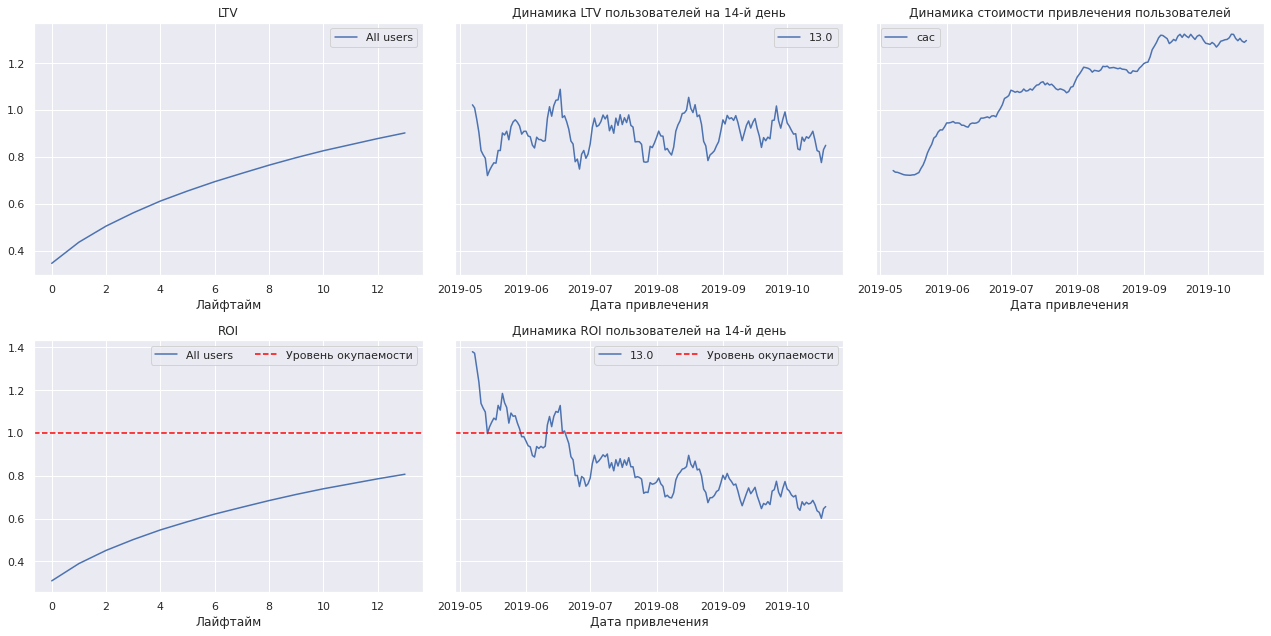

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_nonorganic, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы: к концу второй недели реклама так и не вышла на окупаемость. ROI в конце второй недели достиг лишь 80%, хотя и довольно стабильно рос. При этом стоимость привлечения пользователей (CAC) на протяжении почти всего рассматриваемого периода росла и вышла на плато только в последние полтора-два месяца. LTV подвержен некоторому колебанию, однако, в целом, этот показатель достаточно стабилен, что не дает нам повода говорить о каком-либо ухудшении качества пользователей. Настораживает стабильное снижение уровня возврата на инвестиции (ROI) для каждой вновь привлекаемой когорты, что, по-видимому, связано с ростом затрат на рекламу, поскольку снижение ROI происходило практически обратно пропорционально росту CAC. Это говорит нам о неэффективности вложений в рекламу: в нашем случае рост расходов не дает нужной отдачи, а только напротив, снижает доходы. 

### **Анализ окупаемости рекламы с разбивкой по странам**

Посмотрим, как у нас распределяются данные по странам

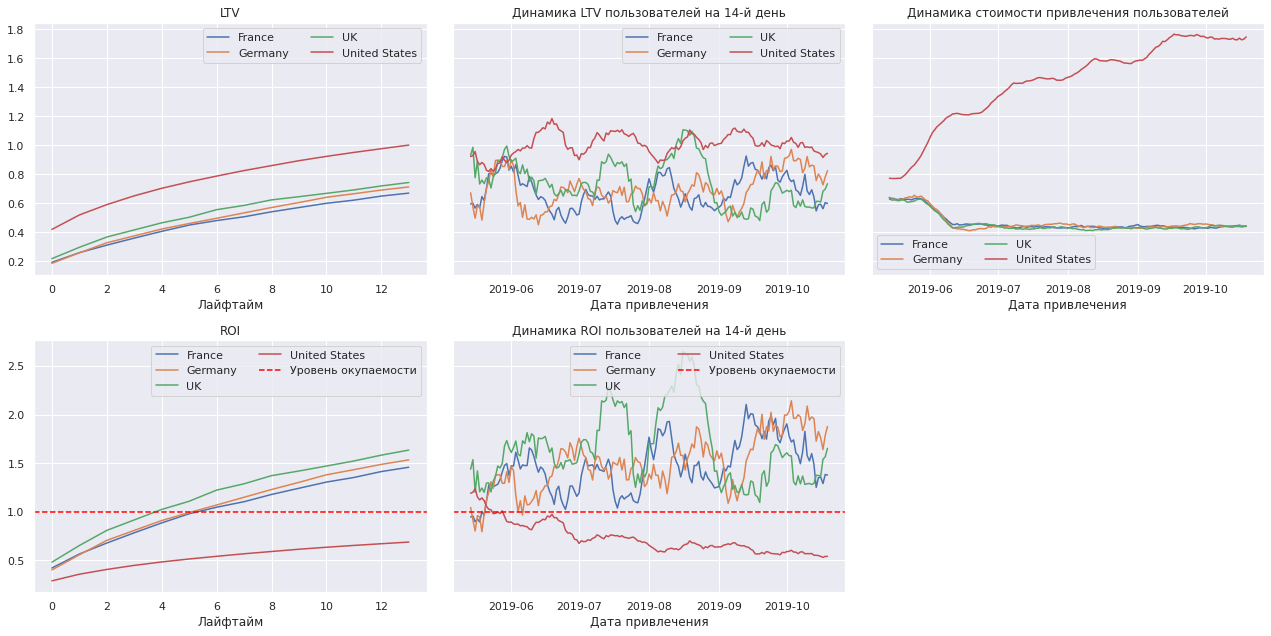

In [ ]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_nonorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Разбивка по странам нам отчетливо показывает, что причина неэффективности рекламных вложений связана с одной конкретной страной - США. Это единственная страна, в которой ROI к концу второй недели так и не выходит на окупаемость (оставаясь ниже 80%). При этом во всех остальных странах затраты окупаются уже на 4-6-й день лайфтайма. Лучше всего окупается Великобритания, но Германия и Франция не сильно отстают от нее.

Сами по себе пользователи из США отличаются довольно высоким "качеством": их LTV стабильно выше LTV пользователей из других стран и имеет тенденцию к росту на протяжении всего лайфтайма. Мы видим, что проблема - в высокой стоимости рекламы привлечения клинетов из США и постоянном росте затрат на нее. Для сравнения - стоимость привлечения пользователей в других странах стабильна и примерно одинакова. 

LTV по всем странам подвержен колебаниям, но в целом, стабилен.


### **Анализ окупаемости в разбивкой по каналам и устройстам**

Теперь проверим каналы привлечения пользователей

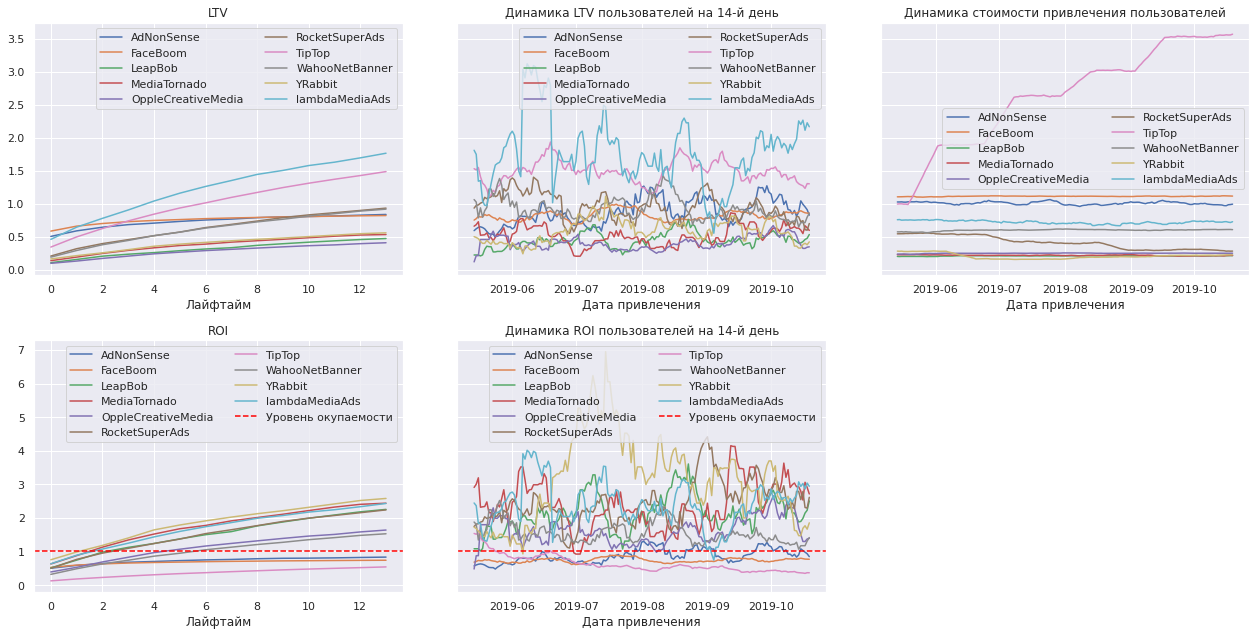

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_nonorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мы видим три явных канала-аутсайдера по окупаемости - TipTop, FaceBoom и AdNonSense. К концу второй недели они так и не вышли на окупаемость. Самый низкий показатель ROI у TipTop - к 14-му дню он едва превысил 50%. Остальные каналы стабильно выходят на окупаемость в пределах 2-го - 6-го дня.

Лидирует по окупаемости YRabbit - к концу второй недели он приносит компании более 150% дохода на инвестиции. LTV у канала не самый высокий, однако вкупе со стабильно низкими затратами на рекламу из расчета на одного пользователя, он приносит в конечном итоге больший доход, чем другие источники.

У TipTop, кстати, один из самых высоких LTV, т.е. плохие показатели канала связаны не с качеством пользователей. Проблема в слишком высоких затратах на рекламу на этом канале и их постоянном росте: если по другим источникам CAC стабилен, то у Tip-Tip CAC поступательно растет и к концу второй недели обгоняет конкурентов по затратам в разы. Возможно, имеет смысл сократить объемы привлечения пользователей через этот источник, поскольку он не дает ожидаемого эффекта в течение того целевого периода, которые мы себе обозначили (две недели). Судя по всему, стоит также пересмотреть подходы к рекламе на FaceBoom и AdNonSense - если мы ставим задачу выйти на окупаемость в пределах двух недель - эти источники не обеспечивают нам поставленной цели.

Исследуем картину в разбивке по устройствам

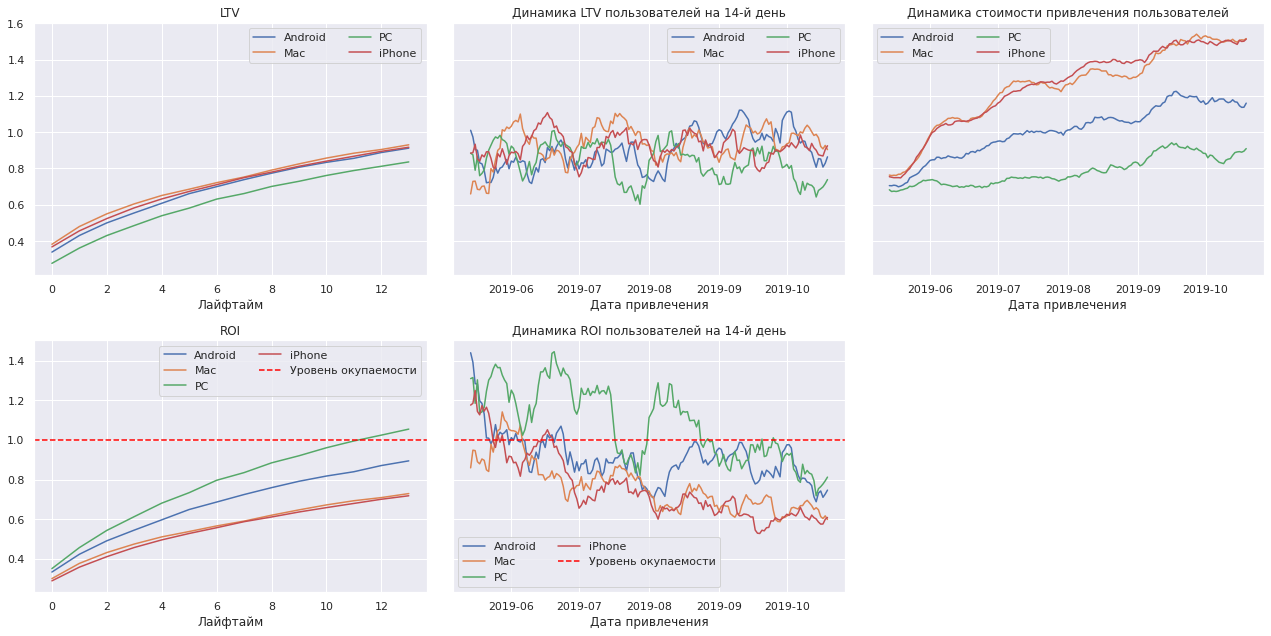

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_nonorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Судя по графикам, пользователи PC выходят на окупаемость к концу второй недели, а вот пользователи других устройств - нет. Динамика LTV по всем устройвами колеблется примерно одинаково, однако стоимость привлечения новых пользователей на Mac и iPhone заметно выше и к тому же постоянно растет. Видимо, ключевая причина неокупаемости пользователей этих устройств все-таки связана с неокупаемостью рекламных каналов по привлечению пользователей из США. Однако прежде чем делать однозначные выводы, стоит также изучить показатели конверсии и удержания.

### **Анализ конверсии и удержания**

Функция для расчета конверсии

In [ ]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

Функция для визуализации конверсии

In [ ]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функция для расчета удержания

In [ ]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
  
    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return result_raw, result_grouped, result_in_time 

Функция для визуализации удержания

In [ ]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Получим готовые таблицы с данными по конверсии и визуализируем данные на графиках

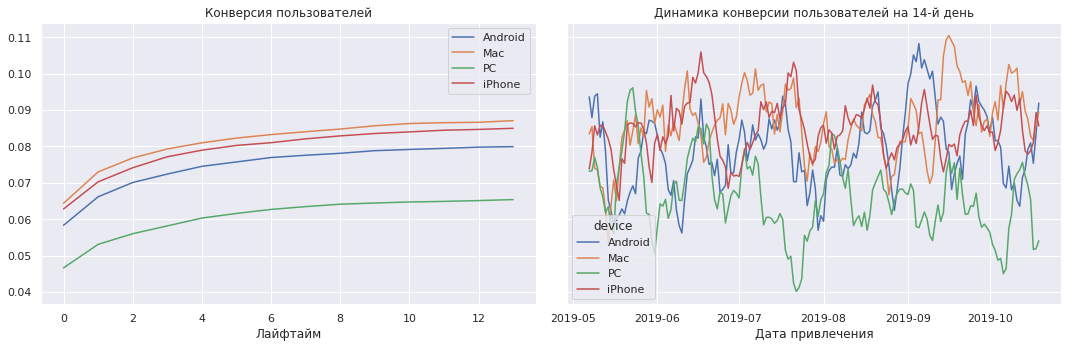

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_nonorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Интересно, что пользователи Mac и iPhone "конвертируются" лучше, чем пользователи PC и Android, значит, по крайней мере, с этим показателем проблем нет. 

Посмотрим удержание с разбивкой по устройствам

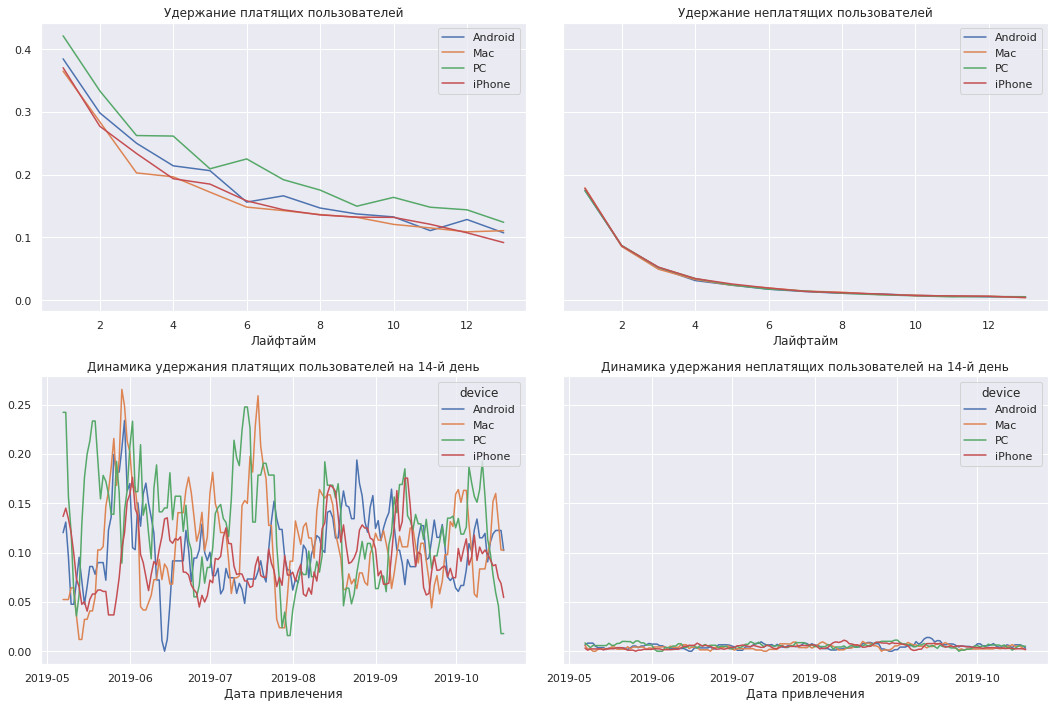

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_nonorganic, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи iPhone удерживаются немного хуже, чем пользователи остальных устройств, однако разница по уровню и по динамике, в целом, не существенная. Для платящих пользователей на iPhone удержание 14-го дня чуть ниже 10%, в то время как у Android и Mac - чуть выше 10%. Самый высокий показатель у пользователей PC - в райне 12%. В целом, каких-то системных проблем с удержанием пользователей Mac и iPhone не просматривается. 

Посмотрим теперь на конверсию и удержание в разбивке по каналам привлечения.

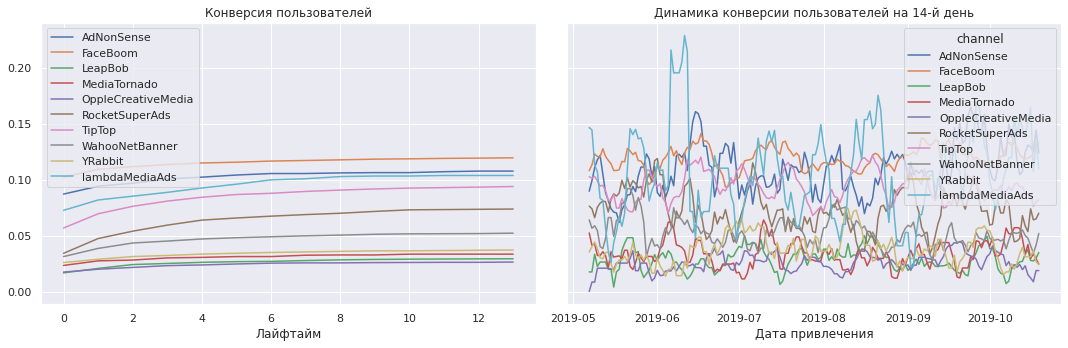

In [ ]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_nonorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи наших трех "аутсайдеров" (TipTop, FaceBoom, AdNonSense) конвертируются лучше многих других конкурентов, что еще раз подтверждает нашу гипотезу о том, что основная причина неокупаемости этих источников состоит в высоких тратах на рекламу на этих каналах, что обесценивает прибыль от пользователей, привлекаемых через эти источники. 

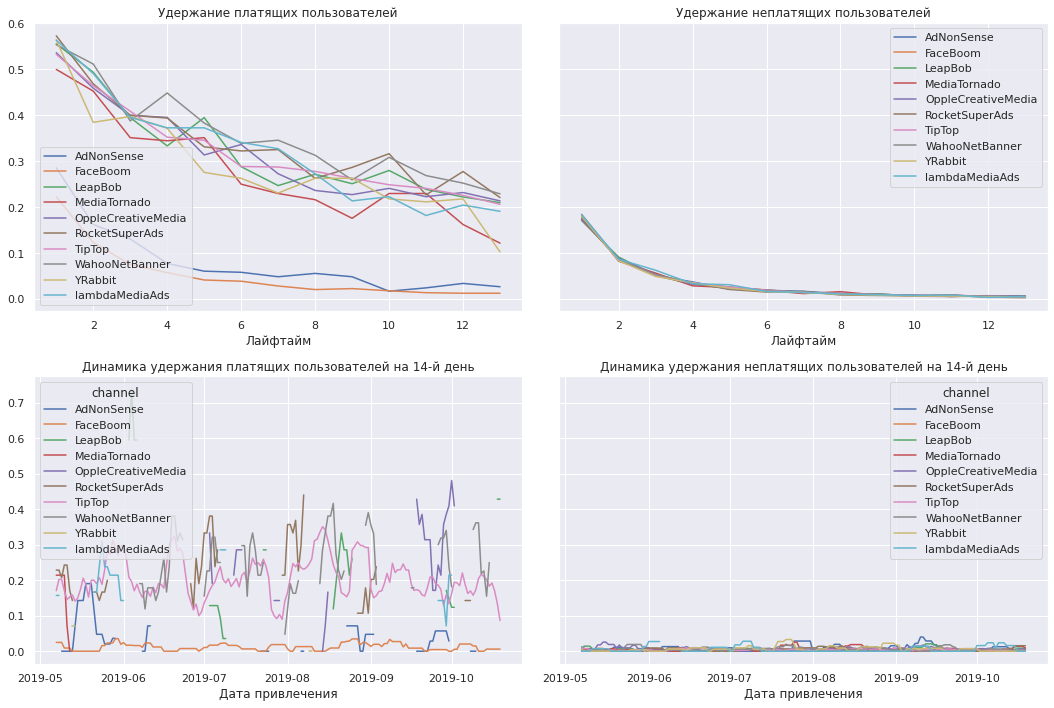

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_nonorganic, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

У FaceBoom и AdNonSense  к вышеобозначенным проблемам добавляется еще и крайне низкий по сравнению с конкурентами уровень удержания платных пользователей. Возможно, эти два канала ориентированы на другую целевую аудиторию, которая по интересам не совпадает с пользователями, на которых ориентируется наша компания, поэтому они быстрее других уходят из приложения.

И, наконец, посмотрим конверсию и удержание по странам

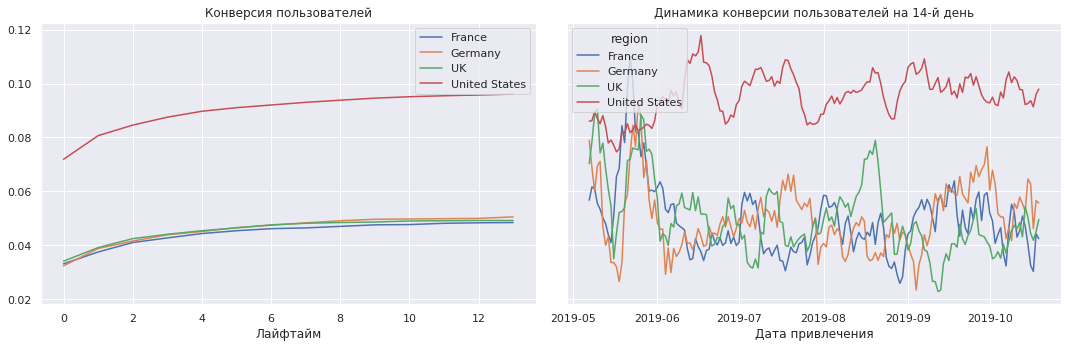

In [ ]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_nonorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия американских пользователей в два раза превосходит другие страны, что говорит об их высоком "качестве". Это примечательно с той точки зрения, что высокий уровень конверсии, как выясняется, не гарантирует компании такой же высокий уровень отдачи на вложения и что высокий уровень затрат на рекламу способен легко перечеркнуть данный фактор.

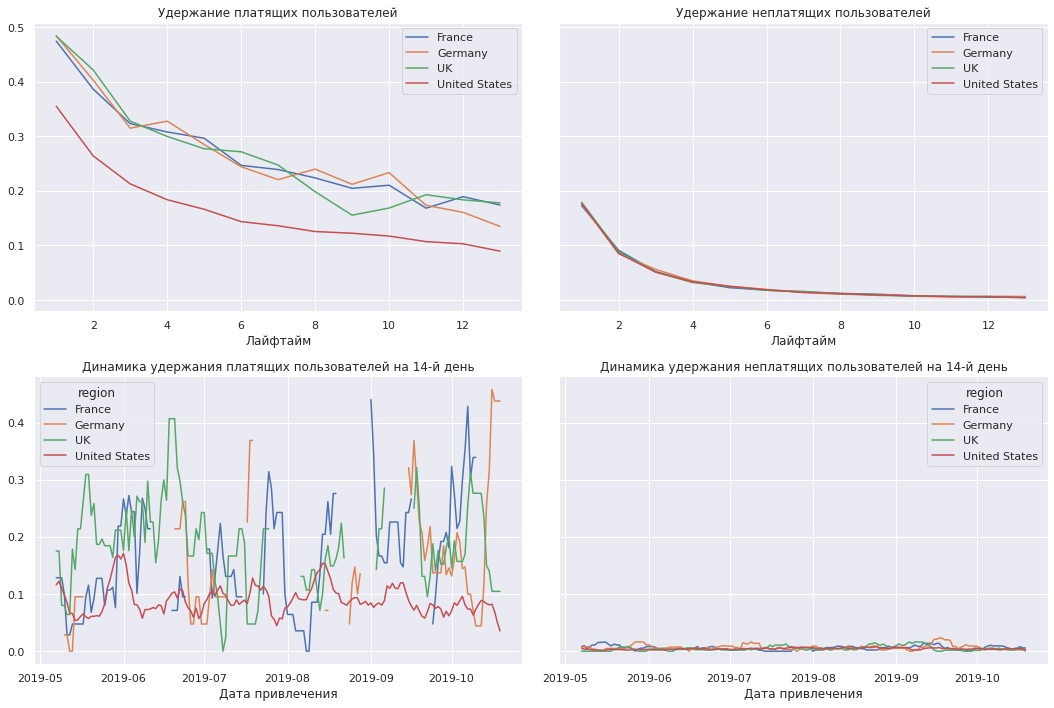

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_nonorganic, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Интересно, что удержание платных пользователей из США, несмотря на их высокую конверсию, оказывается ниже, чем у пользователей других стран. Можно предположить, что американские клиенты приходят как раз, по большей части, через каналы-аутсайдеры по удержанию (FaceBoom и AdNonSense).

Проверим эту гипотезу - посмотрим, распределение платящих клиентов из разных стран по каналам привлечения.

In [ ]:
def graph (country, ax):
    
    donat = (
        profiles_nonorganic[(profiles_nonorganic['region'] == country)&(profiles_nonorganic['payer'] == True)]
        .groupby('channel')['user_id'].nunique().sort_values(ascending=False)
    )
    
    colors = sns.color_palette('pastel', 5)
    ax.pie(donat, labels = donat.index, colors = colors, autopct='%.0f%%', wedgeprops=dict(width=.55), labeldistance=1.05)
    ax.text(-0.01, -0.05, f'{country}', fontweight='bold', fontsize=16, ha='center', va='center')
    plt.tight_layout();

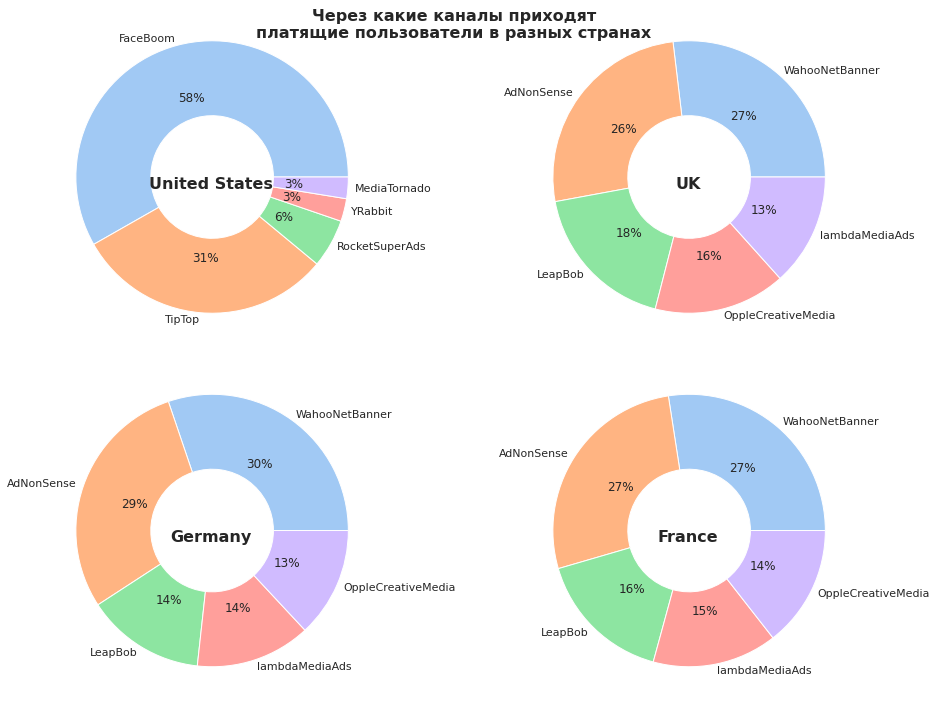

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (14,10))
fig.suptitle('Через какие каналы приходят' + '\n' + 'платящие пользователи в разных странах', fontsize = 16, fontweight='bold')

graph("United States", ax[0,0])
graph("UK", ax[0,1])
graph("Germany", ax[1,0])
graph("France", ax[1,1])

Как мы видим, основной канал для привлечения платящих пользователей из США - это действительно "аутсайдер" нашего рейтинга по удержанию - канал FaceBoom. Через него в приложение приходит почти 60% клиентов, которые покупают потом какие-либо услуги. Однако, судя по графику удержания, надолго эти пользователи не задерживаются, что, по-видимому, также является одной из причин неокупаемости вложений в привлечение американских клиентов. 

FaceBoom - слишком крупный канал для привлечения платящих пользователей, чтобы совсем отказываться от рекламных вложений на нем, однако ситуация, которую мы наблюдаем, совершенно очевидно, требует пересмотра подходов к таким вложениям. Возможно, необходимо серьезнее подойти к определению целевой аудитории, которую компания пытается привлекать через FaceBoom и более точечно отрегулировать настройки, чтобы обеспечить привлечение клиентов, больше заинтересованных в долгосрочном присутствии в приложении.  

Полностью отказываться от вложений в TipTop, который, как мы выяснили ранее, имеет самую высокую стоимость привлечения одного клиента, тоже будет неправильно, поскольку через этот канал приходит треть пользователей из США. А именно они приносят приложению основную прибыль. Однако стоит изучить варианты для снижение себестоимости затрат на этот канал.

Проверим еще одну гипотезу. Возможно, мы поставили нереалистичный срок окупаемости рекламы для каналов FaceBoom и TipTop (две недели), учитывая, что затраты на рекламу на них выше, чем на других каналах. Чем выше затраты - тем больше нужно времени, чтобы их окупить. Проверим показатели LTV, CAC и ROI с горизонтом анализа в 30 дней.  

In [ ]:
horizon_days = 30

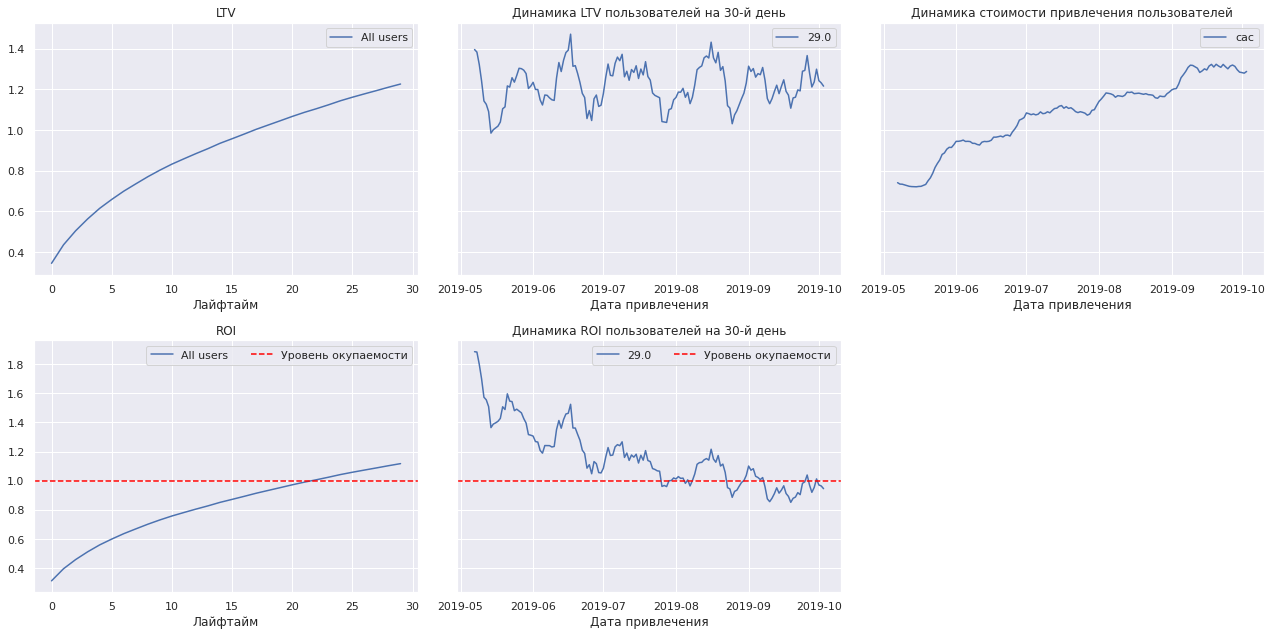

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_nonorganic, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Общие показатели уже лучше: в целом, затраты на рекламу выходят на окупаемость через три недели. Хотя мы видим те же проблемы, которые мешают увеличить общую доходность: поступательный рост стоимости привлечение одного пользователя и снижающийся на фоне этого ROI для каждой новой когорты.

Посмотрим, как обстоят дела на отдельных каналах привлечения по итогам 30 дней.

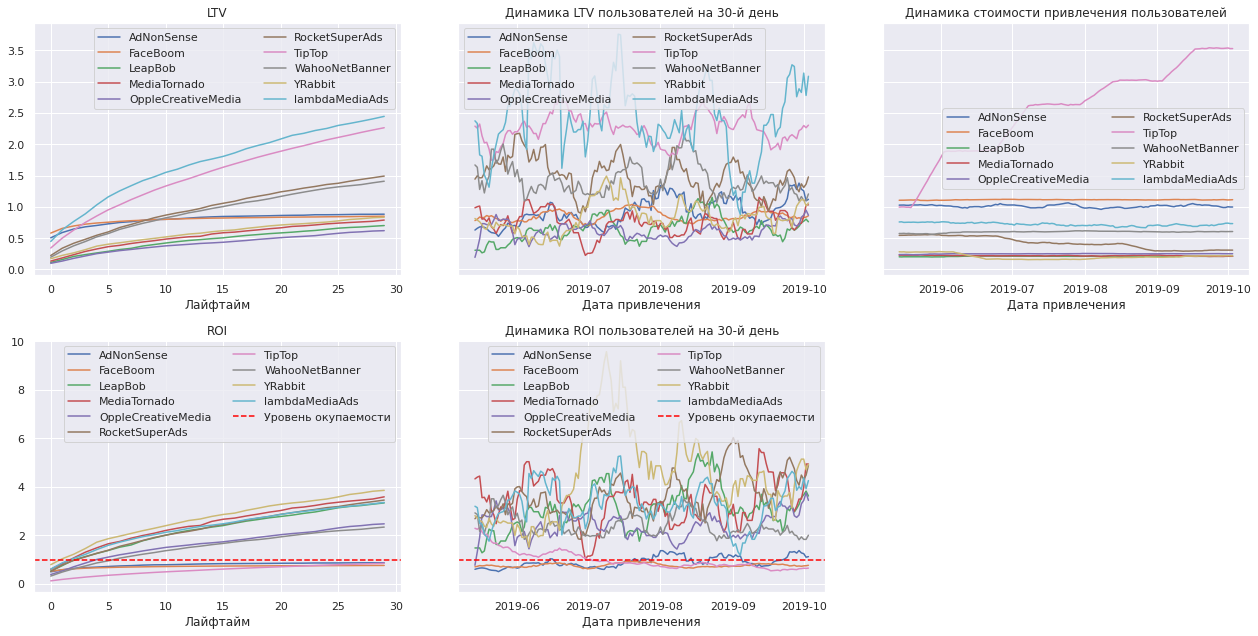

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_nonorganic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [ ]:
threesome = ['FaceBoom', 'TipTop', 'AdNonSense']
profiles_threesome = profiles_nonorganic.query('channel in @threesome')

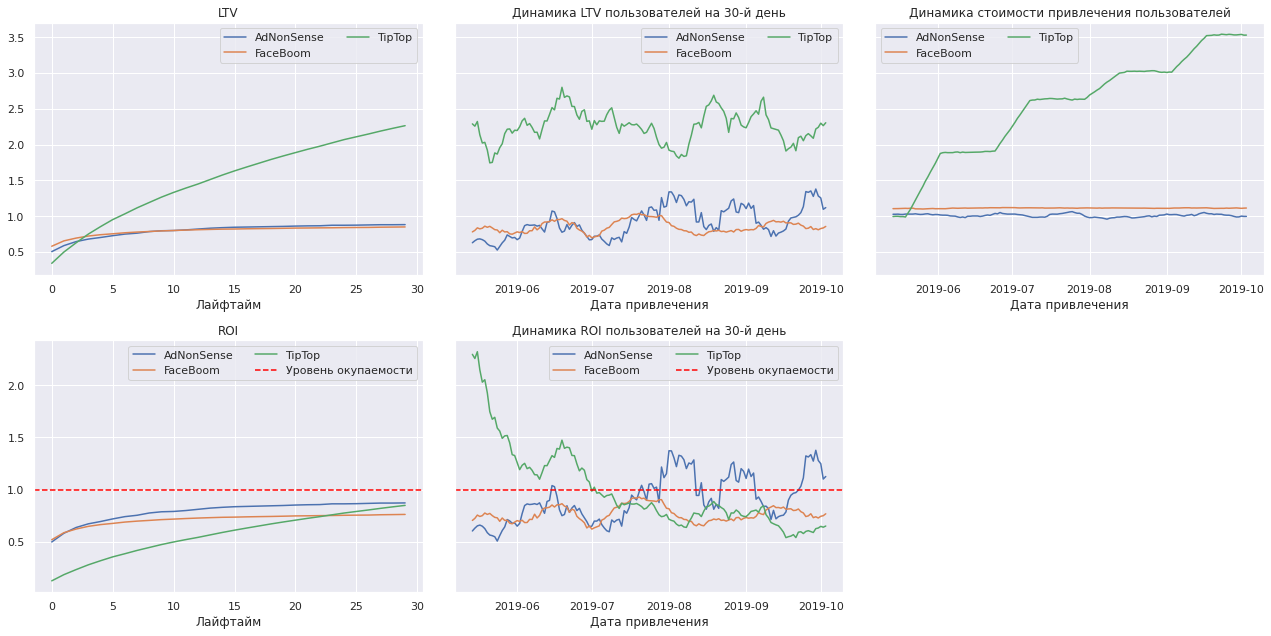

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_threesome, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Три наших "проблемных" канала (FaceBool, TipTop, AdNonSense) не показывают положительных результатов даже по истечении месячного срока. Ни один из них не вышел на окупаемость по итогам 30-го дня. Т.е. наша гипотеза о том, что сроки окупаемости для этих источников нужно продлить, не подтвердились. Однозначно - это повод пересмотреть маркетинговые подходы к размещению рекламы на этих каналах, в первую очередь, на FaceBoom и TipTop, которые являются основными каналами привлечения пользователей в наше приложение.

## **Выводы и рекомендации**

### **Выводы по итогам исследования**

По итогам заданного периода (две недели) общие затраты на привлечение новых пользователей через рекламные каналы не окупаются. Основная проблема наблюдается с рекламой в США: если по всем другим странам ROI выходит на окупаемость, то в США она достигает к концу второй недели всего лишь 80%.

Подавляющая часть американских пользователей приходит через два рекламных канала – FaceBoom (40% платящих клиентов) и TipTop (21% платящих клиентов), и именно на эти каналы тратится большая часть рекламного бюджета нашей компании. При этом проблемы с окупаемостью затрат наблюдаются на обоих каналах. Они не выходят на окупаемость ни по истечении двухнедельного периода, ни даже по итогам месячного срока.

У TipTop самый высокий показатель стоимости привлечения одного клиента (2,8 долл.). Это более чем в 2,5 раза выше, чем у его главного конкурента FaceBoom (1,1 долл.). К тому же, этот показатель у TipTop поступательно растет, что нивелирует доходы, полученные от пользователей, приходящих через этот источник.

У FaceBoom главная проблема – низкий уровень удержания пользователей при довольно высокой конверсии клиентов, т.е. платные пользователи, приходящие через этот источник, не задерживаются в приложении надолго.

Учитывая, что это два основных источника привлечения клиентов в наше приложении, отказываться от рекламных вложений в эти платформы было бы неправильно, однако нужно пересмотреть маркетинговую стратегию в отношении обоих каналов с целью сокращения показателя CAC для TipTop и повышения «качества» привлекаемых клиентов через FaceBoom.

В целом, ориентацию на эти два канала стоит сохранить, поскольку через них привлекается основная часть клиентов из США (а это две трети всех новых пользователей приложения), которые имеют склонность лучше «конвертироваться», чем клиенты из других стран, т.е. чаще переходить в категорию платящих клиентов: среди американцев уровень конверсии составляет 7% (против 4% в среднем для других стран).

Кроме того, стоит обратить внимание на каналы, которые пока, возможно, приводят не так много клиентов, как FaceBoom и TipTop, однако обеспечивают лучший возврат инвестиций: это YRabbit и MediaTornado на американском рынке (их показатель ROI достигает 2,5 по итогам двухнедельного срока) и lambdaMediaAds на европейском рынке (ROI также на уровне 2.5). Можно попробовать увеличить объемы рекламы на этих трех каналах.


### **Рекомендации**

С учетом вышеизложенных выводов можно сделать следующие рекомендации для маркетингового отдела:

**Для канала TipTip:**
+ необходимо добиться сокращения стоимости привлечения одного пользователя (CAC). Возможно, стоит изменить используемый в настоящее время тарифный план в пользу менее затратного и по истечение тестового периода вновь оценить маркетинговые показатели по этому каналу. На сегодняшний день текущий тарифный план TipTip – самый дорогой по показателю CAC из всех источников и не обеспечивает нужной нам окупаемости. 

**Для канала FaceBoom:** 
+ расходы на привлечение одного клиента стабильны, однако удержание пользователей низкая – мы явно привлекаем не нашу целевую аудиторию. Поэтому здесь требуется более таргетная стратегия по привлечению клиентов. Нужно четко определить целевую аудиторию приложения и перестроить рекламную кампанию на FaceBoom с учетом целевой аудитории. 

**Перспективные каналы для увеличения рекламных инвестиций:**

+ следует рассмотреть возможность увеличения вложений в рекламу на каналах, которые пока занимают небольшую долю бюджета, однако являются более перспективными с точки зрения возврата на инвестиции, чем FaceBoom и TipTop. Это платформы YRabbit и MediaTornado для привлечения американских пользователей и канал lambdaMediaAds для привлечения клиентов из Европы.

